本Workshop是用于在MNIST上训练线性分类器的代码。和上一个WorkShop的主要变化是：

我们已经从回归转向分类。

我们正在使用不同的损失函数。现在我们不使用平方误差，而是使用交叉熵。

我们正在使用一个新的数据集。 MNIST包含28x28像素的手写数字。

一个重要的要点：请注意，尽管进行了这些更改，但创建渐变下降优化器的线条与上一个笔记本相同。这是TensorFlow的作用。一旦我们定义了数据流图和损失函数，TensorFlow就能够为我们分析它，并确定如何调整我们的变量以减小损失函数。

我们在这里训练的模型在准确性方面并不令人满意。目的是向您介绍数据集。最后是一个简短的练习。


当你完成本WorkShop后，继续下一步，将我们的线性分类器修改为深度神经网络，并添加代码在TensorBoard中观察训练过程

In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

import numpy as np

import pylab
%matplotlib inline

In [3]:
tf.reset_default_graph()
sess = tf.Session()

In [4]:
# Import the MNIST dataset. 
# It will be downloaded to '/tmp/data' if you don't already have a local copy.
mnist = input_data.read_data_sets('data', one_hot=True)

Extracting data\train-images-idx3-ubyte.gz
Extracting data\train-labels-idx1-ubyte.gz
Extracting data\t10k-images-idx3-ubyte.gz
Extracting data\t10k-labels-idx1-ubyte.gz


Train, validation, test: 55000, 5000, 10000
[ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
1
784


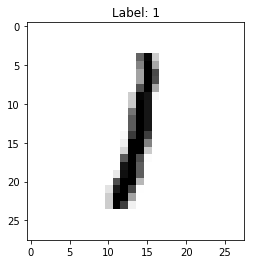

In [14]:
#Uncomment these lines to understand the format of the dataset.

#1.训练集，验证集，测试集
print ('Train, validation, test: %d, %d, %d' % 
      (len(mnist.train.images), len(mnist.validation.images), len(mnist.test.images)))

#labels的值
print (mnist.train.labels[4])

#You can find the index of the label, like this:
print (np.argmax(mnist.train.labels[4]))

#3. An image is a 'flattened' array of 28*28 = 784 pixels.
print (len(mnist.train.images[4]))

#4. To display an image, first reshape it to 28x28.
pylab.imshow(mnist.train.images[4].reshape((28,28)), cmap=pylab.cm.gray_r)   
pylab.title('Label: %d' % np.argmax(mnist.train.labels[4])) 

In [16]:
NUM_CLASSES = 10
NUM_PIXELS = 28 * 28
TRAIN_STEPS = 2000
BATCH_SIZE = 100
LEARNING_RATE = 0.5

In [17]:
# 定义输入
images = tf.placeholder(dtype=tf.float32, shape=[None, NUM_PIXELS])
labels = tf.placeholder(dtype=tf.float32, shape=[None, NUM_CLASSES])

In [18]:
# 定义模型
W = tf.Variable(tf.truncated_normal([NUM_PIXELS, NUM_CLASSES]))
b = tf.Variable(tf.zeros([NUM_CLASSES]))
y = tf.matmul(images, W) + b

In [20]:
# 定义优化器与损失函数
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y, labels=labels))
train_step = tf.train.GradientDescentOptimizer(LEARNING_RATE).minimize(loss) 

In [21]:
# 初始化数据
sess.run(tf.global_variables_initializer())

In [22]:
# 训练模型
for i in range(TRAIN_STEPS):
    batch_images, batch_labels = mnist.train.next_batch(BATCH_SIZE)
    sess.run(train_step, feed_dict={images: batch_images, labels: batch_labels})

In [12]:
# 评估训练模型的结果
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(labels, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
                                  
print("Accuracy %f" % sess.run(accuracy, feed_dict={images: mnist.test.images, 
                                                    labels: mnist.test.labels}))

Accuracy 0.897500


下面我们来测试一下我们训练的模型的准确度，下面是测试单张图片的结果

Predicted: 7, actual: 7


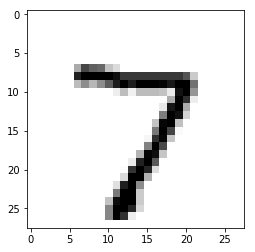

In [13]:
prediction = tf.argmax(y,1)

def predict(i):
    image = mnist.test.images[i]
    actual_label = np.argmax(mnist.test.labels[i])
    predicted_label = sess.run(prediction, feed_dict={images: [image]})
    return predicted_label, actual_label

i = 0
predicted, actual = predict(i)
print ("Predicted: %d, actual: %d" % (predicted, actual))
pylab.imshow(mnist.test.images[i].reshape((28,28)), cmap=pylab.cm.gray_r) 